# Import Libraries

In [1]:
import warnings
warnings.simplefilter(action="ignore")

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import (
    GradientBoostingClassifier,
    RandomForestClassifier
)

from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    classification_report
)

from sklearn.model_selection import (
    KFold,
    train_test_split,
    GridSearchCV,
    cross_val_score
)

import pickle

# 1.&nbsp;Load Dataset

In [2]:
df = pd.read_csv("diabetes.csv")c

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,627.000,50,1
1,1,85,66,29,0,26.6,351.000,31,0
2,8,183,64,0,0,23.3,672.000,32,1
3,1,89,66,23,94,28.1,167.000,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 1.1 Pima Indians Diabetes Database

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, **all patients here are females at least 21 years old of Pima Indian heritage**.

The datasets consists of several medical predictor variables and one target variable, **Outcome**. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

We build a **machine learning model** to accurately predict whether or not the patients in the dataset have **diabetes or not.**

- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function
- **Age**: Age (years)
- **Outcome**: Class variable (0 or 1) 268 of 768 are 1, the others are 0

## 1.2 General Information on Variables

### a. Glucose Tolerance Test
It is a blood test that involves taking multiple blood samples over time, usually 2 hours.It used to diagnose diabetes. The results can be classified as normal, impaired, or abnormal.
* **Normal Results for Diabetes ->** Two-hour glucose level less than 140 mg/dL

* **Impaired Results for Diabetes ->** Two-hour glucose level 140 to 200 mg/dL

* **Abnormal (Diagnostic) Results for Diabetes ->** Two-hour glucose level greater than 200 mg/dL



### b. BloodPressure
The diastolic reading, or the bottom number, is the pressure in the arteries when the heart rests between beats. This is the time when the heart fills with blood and gets oxygen. A normal diastolic blood pressure is lower than 80. A reading of 90 or higher means you have high blood pressure.

* **Normal**: Systolic below 120 and diastolic below 80
* **Elevated**: Systolic 120–129 and diastolic under 80
* **Hypertension stage 1**: Systolic 130–139 and diastolic 80–89
* **Hypertension stage 2**: Systolic 140-plus and diastolic 90 or more
* **Hypertensive crisis**: Systolic higher than 180 and diastolic above 120.

### c. BMI

The standard weight status categories associated with BMI ranges for adults are shown in the following table.

* Below 18.5 -> **Underweight**
* 18.5 – 24.9 -> **Normal or Healthy Weight**
* 25.0 – 29.9 -> **Overweight**
* 30.0 and Above -> **Obese**

### d. Triceps Skinfolds
For adults, the standard normal values for triceps skinfolds are:
* 18.0mm (women)

# 2.&nbsp;Exploratory Data Analysis

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,627.000,50,1
1,1,85,66,29,0,26.6,351.000,31,0
2,8,183,64,0,0,23.3,672.000,32,1
3,1,89,66,23,94,28.1,167.000,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,171.00,63,0
764,2,122,70,27,0,36.8,0.34,27,0
765,5,121,72,23,112,26.2,245.00,30,0
766,1,126,60,0,0,30.1,349.00,47,1
767,1,93,70,31,0,30.4,315.00,23,0


In [6]:
df.shape

(768, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Getting various summary statistics
# There is notably a large difference between 99% and max values of predictors
# “Insulin”, ”SkinThickness”, ”DiabetesPedigreeFunction”
# There are extreme values-Outliers in our data set

# See BMI Min: 0
df.describe(
    percentiles=[0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.0,0.00,1.0,3.0,6.00,9.0,10.000,13.000,17.0
Glucose,768.0,120.894531,31.972618,0.0,79.00,99.0,117.0,140.25,167.0,181.000,196.000,199.0
BloodPressure,768.0,69.105469,19.355807,0.0,38.70,62.0,72.0,80.00,88.0,90.000,106.000,122.0
SkinThickness,768.0,20.536458,15.952218,0.0,0.00,0.0,23.0,32.00,40.0,44.000,51.330,99.0
Insulin,768.0,79.799479,115.244002,0.0,0.00,0.0,30.5,127.25,210.0,293.000,519.900,846.0
BMI,768.0,31.992578,7.884160,0.0,21.80,27.3,32.0,36.60,41.5,44.395,50.759,67.1
DiabetesPedigreeFunction,768.0,347.079349,254.431659,0.1,0.34,165.0,295.5,527.25,722.9,827.300,950.980,997.0
Age,768.0,33.240885,11.760232,21.0,21.00,24.0,29.0,41.00,51.0,58.000,67.000,81.0
Outcome,768.0,0.348958,0.476951,0.0,0.00,0.0,0.0,1.00,1.0,1.000,1.000,1.0


In [9]:
# Target Variable: Categorical
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [10]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [11]:
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

# 3.&nbsp;Data Visualization

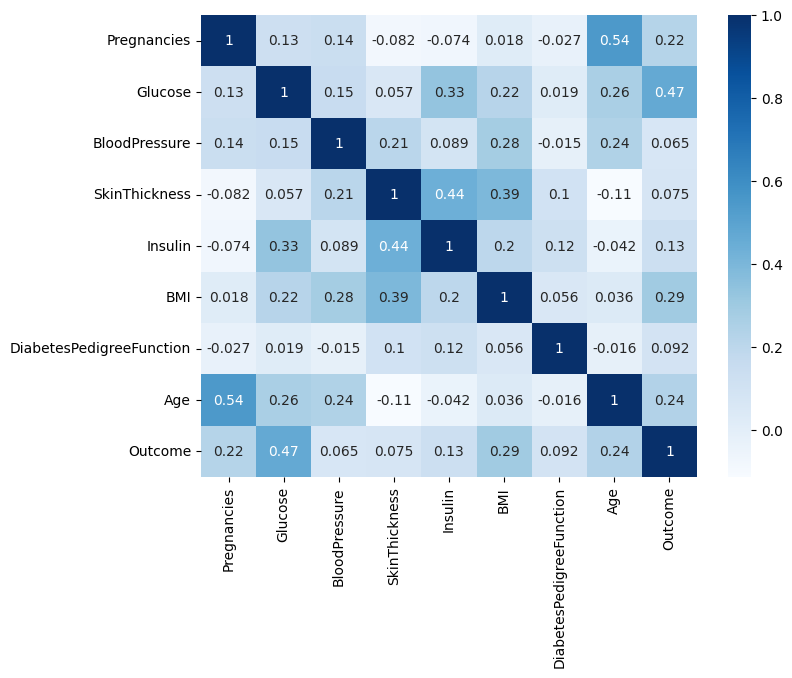

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    df.corr(),
    cmap='Blues',
    annot=True
);

In [13]:
df.nlargest(10, 'BloodPressure')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
106,1,96,122,0,0,22.4,207.00,27,0
691,13,158,114,0,0,42.3,257.00,44,1
43,9,171,110,24,240,45.4,721.00,54,1
177,0,129,110,46,130,67.1,319.00,26,1
549,4,189,110,31,0,28.5,0.68,37,0
84,5,137,108,0,0,48.8,227.00,37,1
362,5,103,108,37,0,39.2,305.00,65,0
658,11,127,106,0,0,39.0,0.19,51,0
662,8,167,106,46,231,37.6,165.00,43,1
672,10,68,106,23,49,35.5,285.00,47,0


In [14]:
# df.corr()

In [15]:
k = 10
k_largest_corr = df.corr().nlargest(k, 'Outcome')
k_largest_feats = k_largest_corr['Outcome'].index
list(k_largest_feats)

['Outcome',
 'Glucose',
 'BMI',
 'Age',
 'Pregnancies',
 'Insulin',
 'DiabetesPedigreeFunction',
 'SkinThickness',
 'BloodPressure']

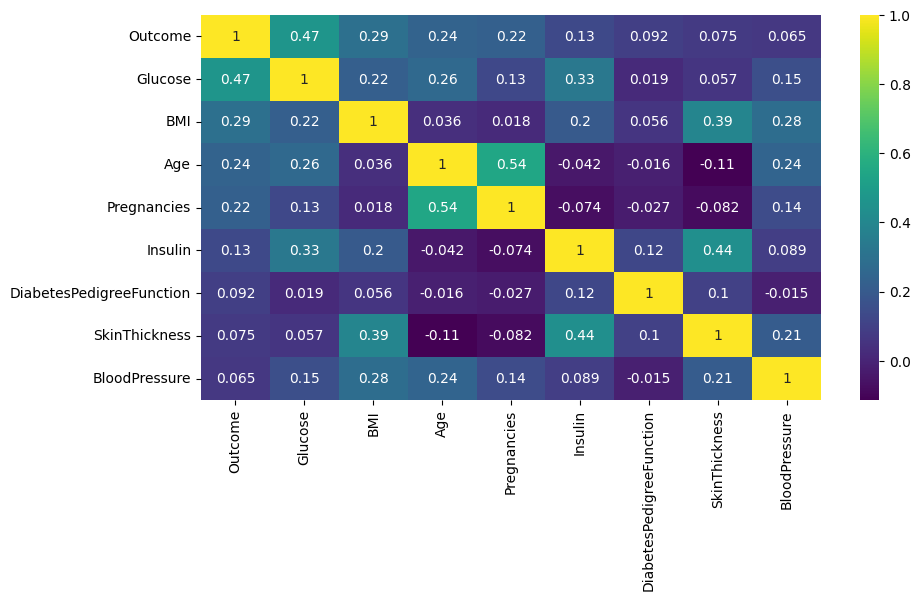

In [16]:
# Outcome correlation matrix

k = 9 # number of variables for heatmap
cols = df.corr().nlargest(k, 'Outcome')['Outcome'].index
corr_mat = df[cols].corr()

# Visualize
plt.figure(figsize=(10, 5))
sns.heatmap(
    corr_mat, cmap='viridis', annot=True,
);

In [17]:
# df.loc[df.Pregnancies==12]

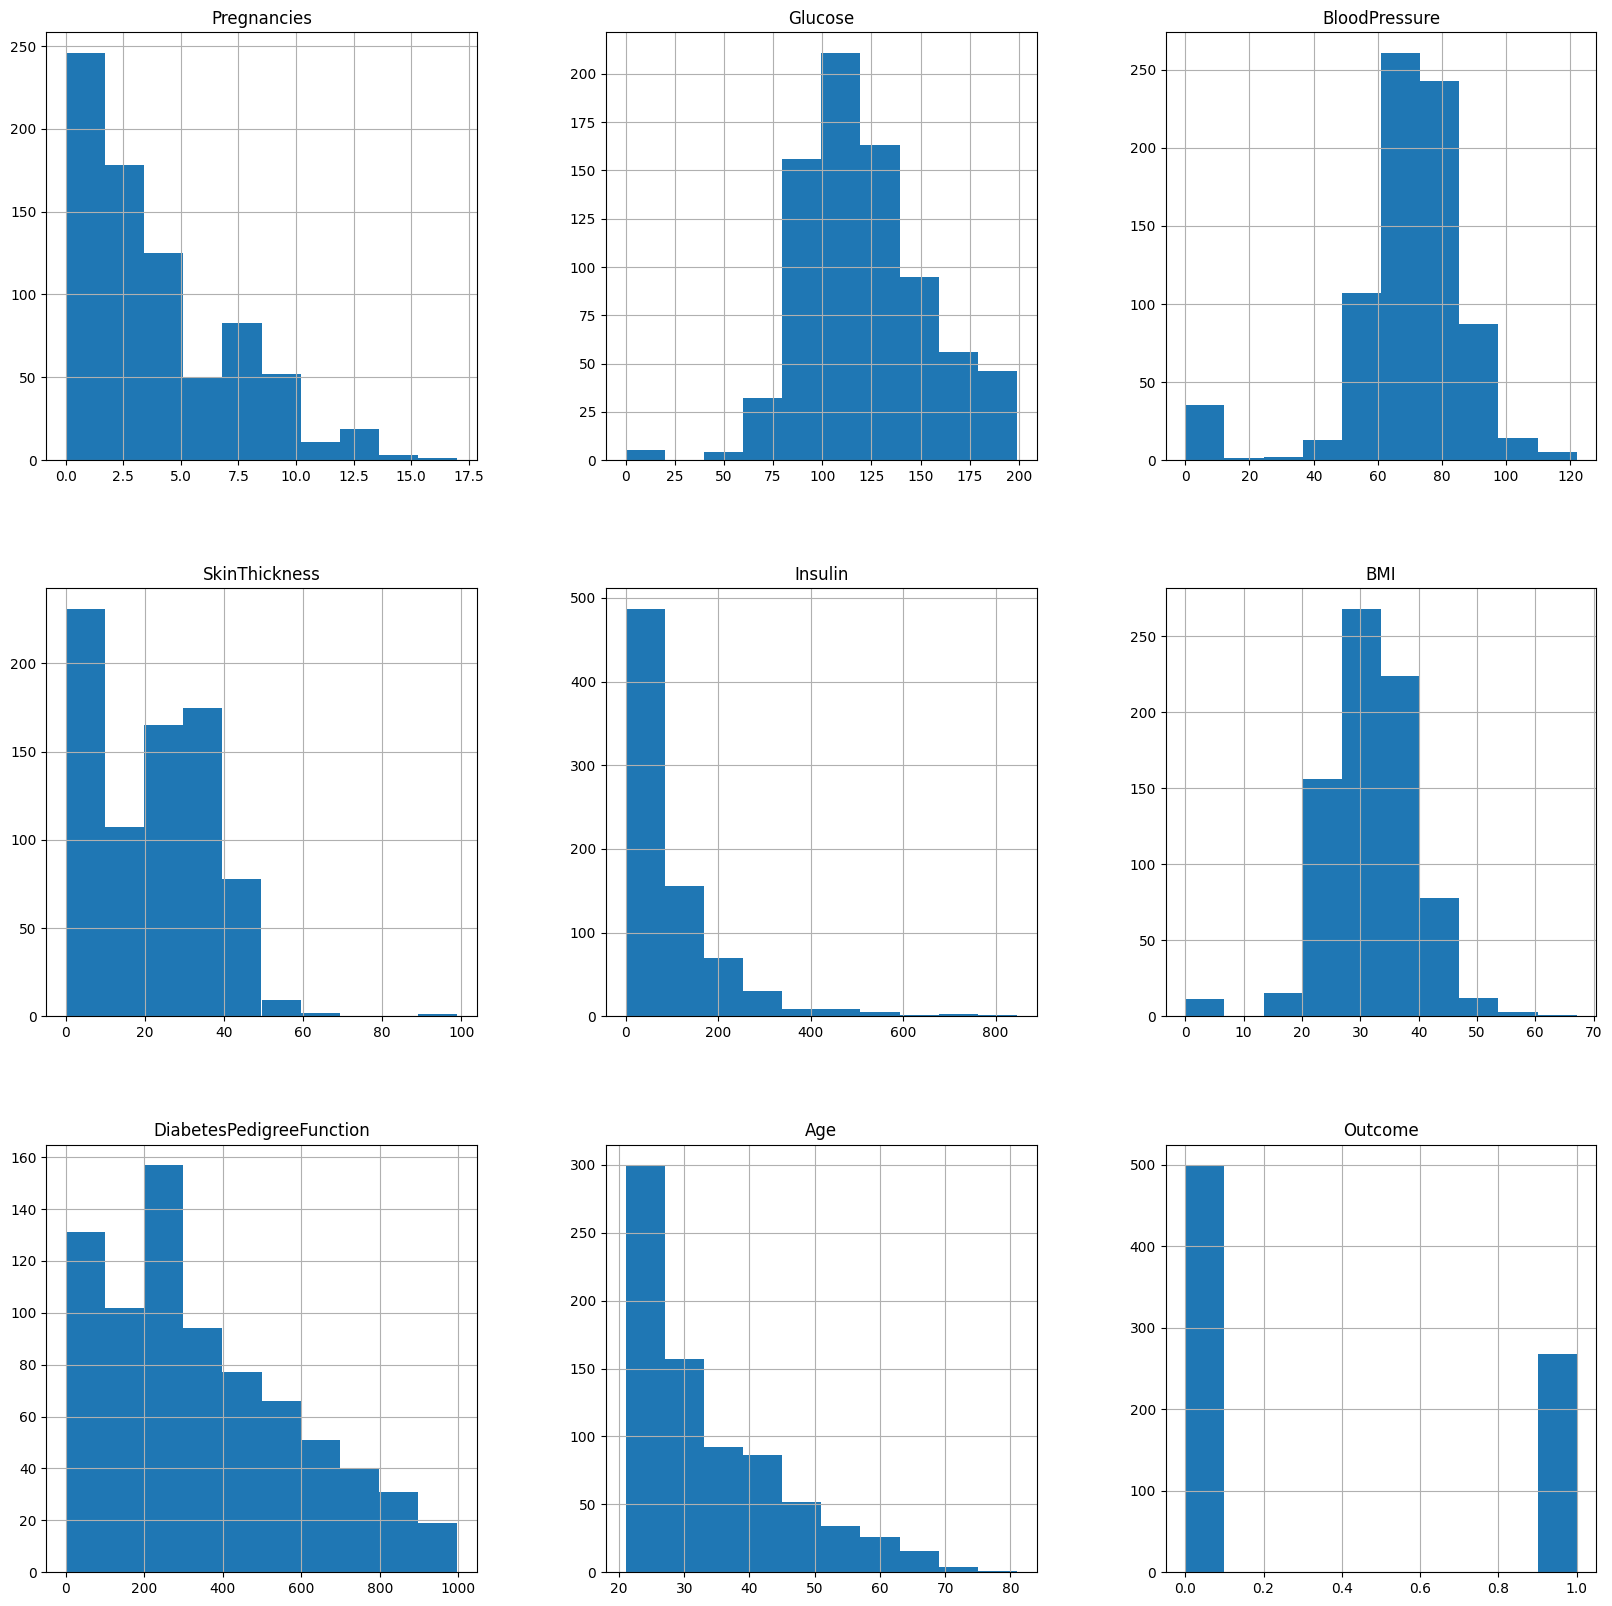

In [18]:
# see how the data is distributed.
df.hist(figsize=(20,20));

In [19]:
df['Age'].mean(), df['Age'].median()

(33.240885416666664, 29.0)

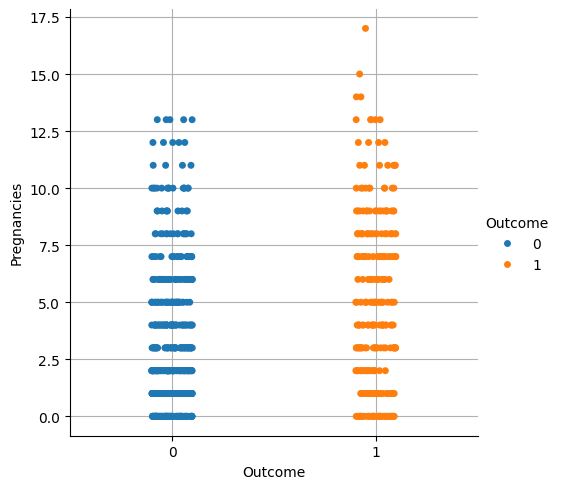

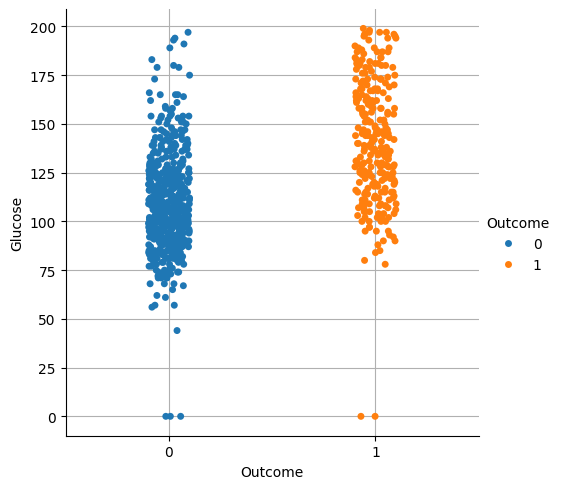

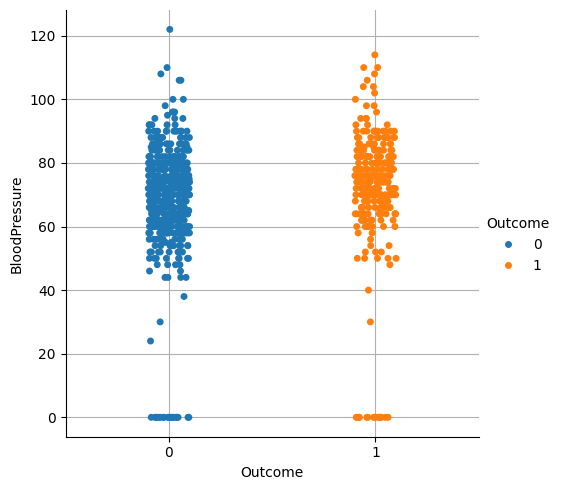

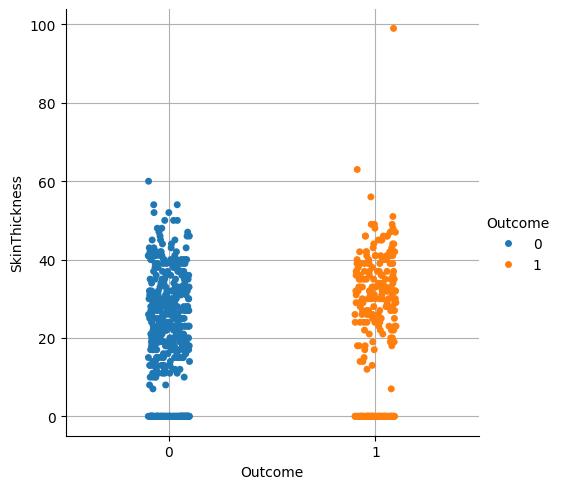

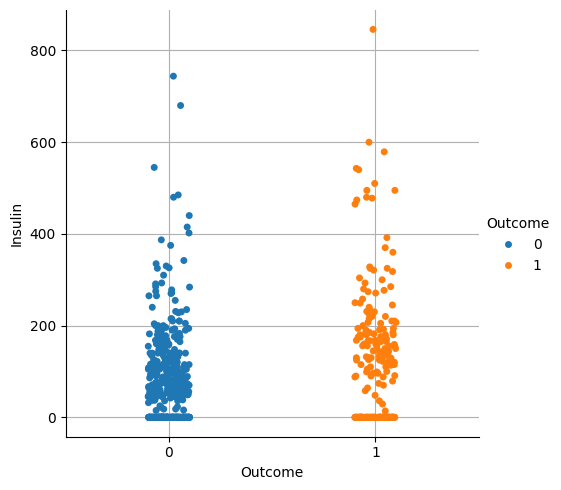

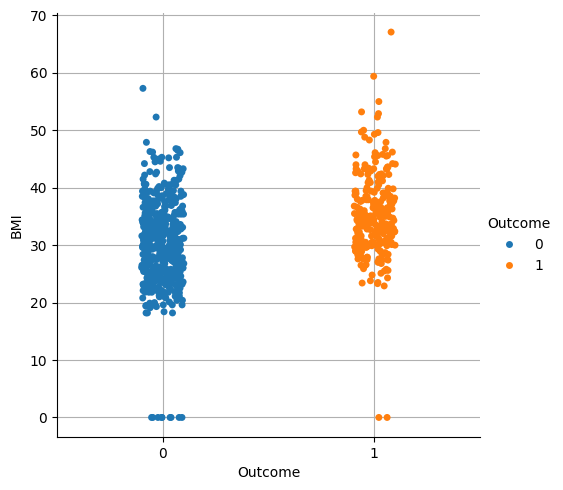

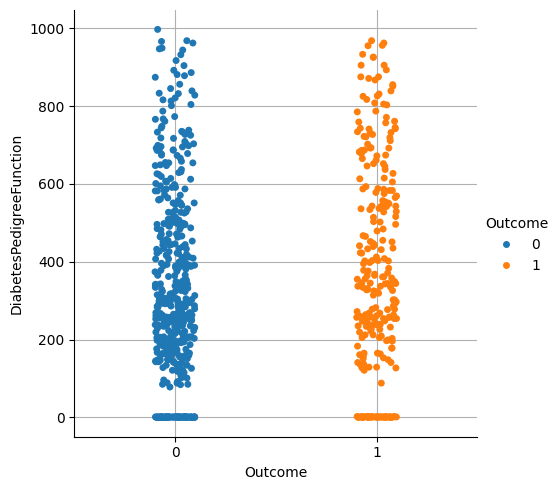

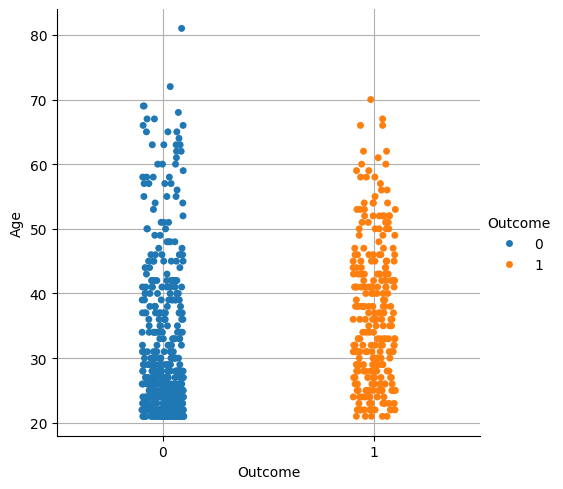

In [20]:
for col in df.columns:
    if col != "Outcome":
        sns.catplot(
            data=df, x="Outcome",
            y=col, hue="Outcome")
        plt.grid()

# 4.&nbsp;Data Preprocessing

In [21]:
# Observation units for variables with a minimum value of zero are NaN,
# except for the pregnancy variable.
df.describe(
    percentiles=[0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.0,0.00,1.0,3.0,6.00,9.0,10.000,13.000,17.0
Glucose,768.0,120.894531,31.972618,0.0,79.00,99.0,117.0,140.25,167.0,181.000,196.000,199.0
BloodPressure,768.0,69.105469,19.355807,0.0,38.70,62.0,72.0,80.00,88.0,90.000,106.000,122.0
SkinThickness,768.0,20.536458,15.952218,0.0,0.00,0.0,23.0,32.00,40.0,44.000,51.330,99.0
Insulin,768.0,79.799479,115.244002,0.0,0.00,0.0,30.5,127.25,210.0,293.000,519.900,846.0
BMI,768.0,31.992578,7.884160,0.0,21.80,27.3,32.0,36.60,41.5,44.395,50.759,67.1
DiabetesPedigreeFunction,768.0,347.079349,254.431659,0.1,0.34,165.0,295.5,527.25,722.9,827.300,950.980,997.0
Age,768.0,33.240885,11.760232,21.0,21.00,24.0,29.0,41.00,51.0,58.000,67.000,81.0
Outcome,768.0,0.348958,0.476951,0.0,0.00,0.0,0.0,1.00,1.0,1.000,1.000,1.0


## Handling Missing Values: Imputation

In [22]:
# NaN values of 0 for Glucose, Blood Pressure, Skin Thickness, Insulin, BMI
# We can write Nan instead of 0

cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    df[col].replace(0, np.NaN, inplace=True)

In [23]:
# now we can see missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [24]:
df["Outcome"] == 0

0      False
1       True
2      False
3       True
4      False
5       True
6      False
7       True
8      False
9      False
10      True
11     False
12      True
13     False
14     False
15     False
16     False
17     False
18      True
19     False
20      True
21      True
22     False
23     False
24     False
25     False
26     False
27      True
28      True
29      True
30      True
31     False
32      True
33      True
34      True
35      True
36      True
37     False
38     False
39     False
40      True
41      True
42      True
43     False
44      True
45     False
46      True
47      True
48     False
49      True
50      True
51      True
52      True
53     False
54      True
55      True
56     False
57      True
58      True
59      True
60      True
61     False
62      True
63      True
64     False
65      True
66     False
67      True
68      True
69      True
70     False
71      True
72     False
73      True
74      True
75      True
76      True

In [25]:
# We can fill in NaN values with a median
# according to the target value

cols = [
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI"
]

mask_label_zero = (df["Outcome"] == 0)
mask_label_one = (df["Outcome"] == 1)

for col in cols:

    mask_col_null = df[col].isnull()
    col_median_zero = df[mask_label_zero][col].median()
    col_median_one = df[mask_label_one][col].median()

    df.loc[(mask_label_zero & mask_col_null), col] = col_median_zero
    df.loc[(mask_label_one & mask_col_null), col] = col_median_one

In [26]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [27]:
# df[(df['Pregnancies'] == 1)].any(axis=0)
# df[(df['Pregnancies'] == 1)].any(axis=None)
# (df['Pregnancies'] == 1).all(axis=None)

## Outlier Handling

In [28]:
def outlier_thresholds(
        df, feature,
        quantile_lower=0.25,
        quantile_upper=0.75):

    Q1 = df[feature].quantile(quantile_lower)
    Q3 = df[feature].quantile(quantile_upper)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    return lower_limit, upper_limit

In [29]:
def has_outliers(
        df, feature,
        quantile_lower=0.25,
        quantile_upper=0.75):
    """
    Args:
        df (pd.DataFrame): DataFrame containing feature
        feature (str): feature name to be checked

    Return:
        bool: Is outlier(s) exist in given feature in the DataFrame
    """
    low_lim, up_lim = outlier_thresholds(
        df, feature, quantile_lower, quantile_upper)
    exist_lower_outliers = (df[feature] < low_lim).any(axis=None)
    exist_upper_outliers = (df[feature] > up_lim).any(axis=None)

    return (exist_lower_outliers or exist_upper_outliers)

In [30]:
for feat in df.columns:
    exist_outliers = has_outliers(
        df, feat, quantile_lower=0.1, quantile_upper=0.9)
    if exist_outliers:
        print(f"Outliers exist in {feat}!")

Outliers exist in SkinThickness!
Outliers exist in Insulin!


In [31]:
feats_with_outliers = []

for feat in df.columns:
    exist_outliers = has_outliers(
        df, feat, quantile_lower=0.1, quantile_upper=0.9)
    if exist_outliers:
        feats_with_outliers.append(feat)

In [32]:
feats_with_outliers

['SkinThickness', 'Insulin']

In [33]:
def replace_with_thresholds(df, numerical_feats):
    for feat in numerical_feats:
        low_limit, up_limit = outlier_thresholds(df, feat)

        mask_lower = (df[feat] < low_limit)
        mask_upper = (df[feat] > up_limit)

        df.loc[mask_lower, feat] = low_limit
        df.loc[mask_upper, feat] = up_limit

In [34]:
replace_with_thresholds(df,feats_with_outliers)

In [35]:
df.describe(
    percentiles=[0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.0,0.000,1.00,3.00,6.00,9.0,10.000,13.000,17.0
Glucose,768.0,121.677083,30.464161,44.0,80.000,99.75,117.00,140.25,167.0,181.000,196.000,199.0
BloodPressure,768.0,72.389323,12.106039,24.0,52.000,64.00,72.00,80.00,88.0,90.000,106.000,122.0
SkinThickness,768.0,28.848307,7.559161,14.5,14.675,25.00,28.00,32.00,40.0,42.500,42.500,42.5
Insulin,768.0,133.085938,58.124185,14.0,50.000,102.50,102.50,169.50,210.0,270.000,270.000,270.0
BMI,768.0,32.434635,6.880498,18.2,22.235,27.50,32.05,36.60,41.5,44.395,50.759,67.1
DiabetesPedigreeFunction,768.0,347.079349,254.431659,0.1,0.340,165.00,295.50,527.25,722.9,827.300,950.980,997.0
Age,768.0,33.240885,11.760232,21.0,21.000,24.00,29.00,41.00,51.0,58.000,67.000,81.0
Outcome,768.0,0.348958,0.476951,0.0,0.000,0.00,0.00,1.00,1.0,1.000,1.000,1.0


# 5.&nbsp;Feature Engineering

See 1.1 & 1.2

## Feature Categorization

In [36]:
max(df['Glucose'])

199.0

In [37]:
df['New_Glucose_Class'] = pd.cut(
    x=df['Glucose'],
    bins=[0, 139, 200],
    labels=["Normal", "Pre-Diabetes"]
)

In [38]:
df['New_Glucose_Class'].value_counts(normalize=True)

Normal          0.740885
Pre-Diabetes    0.259115
Name: New_Glucose_Class, dtype: float64

In [39]:
df['New_BMI_Range'] = pd.cut(
    x=df['BMI'],
    bins=[0, 18.5, 24.9, 29.9, 100],
    labels=["Underweight", "Healthy", "Overweight", "Obese"]
)

df['New_BMI_Range'].value_counts(normalize=True)

Obese          0.628906
Overweight     0.233073
Healthy        0.132812
Underweight    0.005208
Name: New_BMI_Range, dtype: float64

In [40]:
df['New_BloodPressure'] = pd.cut(
    x=df['BloodPressure'],
    bins=[0, 79, 89, 123],
    labels=["Normal", "HS1", "HS2"]
)

df['New_BloodPressure'].value_counts(normalize=True)

Normal    0.733073
HS1       0.188802
HS2       0.078125
Name: New_BloodPressure, dtype: float64

In [41]:
df['New_SkinThickness'] = (
    df['SkinThickness']
    .apply(lambda x: 1 if x <= 18.0 else 0)
)

In [42]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose_Class,New_BMI_Range,New_BloodPressure,New_SkinThickness
0,6,148.0,72.0,35.0,169.5,33.6,627.000,50,1,Pre-Diabetes,Obese,Normal,0
1,1,85.0,66.0,29.0,102.5,26.6,351.000,31,0,Normal,Overweight,Normal,0
2,8,183.0,64.0,32.0,169.5,23.3,672.000,32,1,Pre-Diabetes,Healthy,Normal,0
3,1,89.0,66.0,23.0,94.0,28.1,167.000,21,0,Normal,Overweight,Normal,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Normal,Obese,Normal,0


## One-Hot Encoding

In [43]:
def one_hot_encoder(
        df, categorical_feats,
        nan_as_category=False):

    original_columns = list(df.columns)

    df = pd.get_dummies(
        df,
        columns=categorical_feats,
        dummy_na=nan_as_category,
        drop_first=True
    )

    new_columns = [col for col in df.columns if col not in original_columns]
    return df, new_columns

In [44]:
categorical_feats = [feat for feat in df.columns if len(df[feat].unique()) <= 10 and feat != "Outcome"]
categorical_feats

['New_Glucose_Class',
 'New_BMI_Range',
 'New_BloodPressure',
 'New_SkinThickness']

In [45]:
df, new_cols_ohe = one_hot_encoder(df, categorical_feats)
new_cols_ohe

['New_Glucose_Class_Pre-Diabetes',
 'New_BMI_Range_Healthy',
 'New_BMI_Range_Overweight',
 'New_BMI_Range_Obese',
 'New_BloodPressure_HS1',
 'New_BloodPressure_HS2',
 'New_SkinThickness_1']

In [46]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose_Class_Pre-Diabetes,New_BMI_Range_Healthy,New_BMI_Range_Overweight,New_BMI_Range_Obese,New_BloodPressure_HS1,New_BloodPressure_HS2,New_SkinThickness_1
0,6,148.0,72.0,35.0,169.5,33.6,627.000,50,1,1,0,0,1,0,0,0
1,1,85.0,66.0,29.0,102.5,26.6,351.000,31,0,0,0,1,0,0,0,0
2,8,183.0,64.0,32.0,169.5,23.3,672.000,32,1,1,1,0,0,0,0,0
3,1,89.0,66.0,23.0,94.0,28.1,167.000,21,0,0,0,1,0,0,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,0,1,0,0,0


## Feature Scaling

In [47]:
like_num = [col for col in df.columns if df[col].dtypes != 'O' and len(df[col].value_counts()) < 10]
no_need_to_scaled = new_cols_ohe + ["Outcome"] + like_num
cols_need_scale = [col for col in df.columns if col not in no_need_to_scaled]

print("List of columns that need to be scaled:\n", cols_need_scale)
rs = RobustScaler()
df.loc[:, cols_need_scale] = rs.fit_transform(df[cols_need_scale])
print("Feature Scaling, Done!")

List of columns that need to be scaled:
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Feature Scaling, Done!


In [48]:
like_num

['Outcome',
 'New_Glucose_Class_Pre-Diabetes',
 'New_BMI_Range_Healthy',
 'New_BMI_Range_Overweight',
 'New_BMI_Range_Obese',
 'New_BloodPressure_HS1',
 'New_BloodPressure_HS2',
 'New_SkinThickness_1']

In [49]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose_Class_Pre-Diabetes,New_BMI_Range_Healthy,New_BMI_Range_Overweight,New_BMI_Range_Obese,New_BloodPressure_HS1,New_BloodPressure_HS2,New_SkinThickness_1
0,0.6,0.765432,0.000,1.000000,1.000000,0.170330,0.915114,1.235294,1,1,0,0,1,0,0,0
1,-0.4,-0.790123,-0.375,0.142857,0.000000,-0.598901,0.153209,0.117647,0,0,0,1,0,0,0,0
2,1.0,1.629630,-0.500,0.571429,1.000000,-0.961538,1.039337,0.176471,1,1,1,0,0,0,0,0
3,-0.4,-0.691358,-0.375,-0.714286,-0.126866,-0.434066,-0.354727,-0.470588,0,0,0,1,0,0,0,0
4,-0.6,0.493827,-2.000,1.000000,0.977612,1.214286,-0.809419,0.235294,1,0,0,0,1,0,0,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Pregnancies                     768 non-null    float64
 1   Glucose                         768 non-null    float64
 2   BloodPressure                   768 non-null    float64
 3   SkinThickness                   768 non-null    float64
 4   Insulin                         768 non-null    float64
 5   BMI                             768 non-null    float64
 6   DiabetesPedigreeFunction        768 non-null    float64
 7   Age                             768 non-null    float64
 8   Outcome                         768 non-null    int64  
 9   New_Glucose_Class_Pre-Diabetes  768 non-null    uint8  
 10  New_BMI_Range_Healthy           768 non-null    uint8  
 11  New_BMI_Range_Overweight        768 non-null    uint8  
 12  New_BMI_Range_Obese             768 

# 6.&nbsp;Modeling

## Notes: Metric Evaluation

See [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

The choice between micro-average, macro-average, or weighted-average in the classification_report from scikit-learn depends on your specific use case and the characteristics of your data. Each average type provides a different perspective on the overall model performance.

Here's a brief explanation of each average type:

1. **Micro-average:**

    Calculates metrics globally by considering all instances together.

    Suitable when classes are imbalanced, and you want to treat all instances equally.
    Gives equal weight to each data point, regardless of class.

2. **Macro-average:**

    Calculates metrics for each class independently and then takes the unweighted average.

    Suitable when you want to evaluate the overall performance across all classes without considering class imbalances.
    Gives equal weight to each class, regardless of the number of instances in each class.

3. **Weighted-average:**

    Calculates metrics for each class independently and then takes the average, weighted by the number of true instances for each class.

    Suitable when classes are imbalanced, and you want to give more importance to the performance on larger classes.
    Provides a balanced view of the overall performance by accounting for class imbalances.

In summary:

- Use micro-average when you want to treat all instances equally, especially in the presence of class imbalances.

- Use macro-average when you want to evaluate the overall performance without considering class imbalances.

- Use weighted-average when you want to account for class imbalances and give more importance to the larger classes.


It's essential to choose the appropriate average based on the goals of your analysis and the nature of your data.

In some cases, you may need to consider multiple metrics and averages to get a comprehensive understanding of your model's performance.

In [51]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,    # 10% for testing
    stratify=y,       # Stratified sampling based on labels
    random_state=42   # Random seed for reproducibility
)

In [53]:
print("y train:", y_train.value_counts(normalize=True))
print("\n")
print("y test:", y_test.value_counts(normalize=True))

y train: 0    0.65123
1    0.34877
Name: Outcome, dtype: float64


y test: 0    0.649351
1    0.350649
Name: Outcome, dtype: float64


In [54]:
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score
)

In [55]:
models = [
    ('LR', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('SVC', SVC(gamma='auto')),
    ('XGBM', XGBClassifier()),
    ('GB', GradientBoostingClassifier()),
    ('LightGB', LGBMClassifier())
]

# Evaluate each model in turn
scorings = [
    'accuracy', 'f1_macro',
    'precision_macro', 'recall_macro'
]

model_perf = {}

# For each model
for name, model in models:

    results = {}

    # for each scorings
    for scoring in scorings:
        score_mean = []
        score_std = []

        # Define K-Fold
        kfold = KFold(
            n_splits=10, shuffle=True,
            random_state=42)

        # Training with cross validation
        cv_results = cross_val_score(
            model, X_train, y_train,
            cv=kfold, scoring=scoring)

        # Save Training Result
        results[scoring] = {
            'train_mean': cv_results.mean(),
            'train_std': cv_results.std()
        }

    model_perf[name] = results

[LightGBM] [Info] Number of positive: 213, number of negative: 408
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 621, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.342995 -> initscore=-0.649975
[LightGBM] [Info] Start training from score -0.649975
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [56]:
model_perf

{'LR': {'accuracy': {'train_mean': 0.8104140786749483,
   'train_std': 0.033354808354396595},
  'f1_macro': {'train_mean': 0.7783635721768168,
   'train_std': 0.043539216693034545},
  'precision_macro': {'train_mean': 0.796564277833483,
   'train_std': 0.0461615694508768},
  'recall_macro': {'train_mean': 0.7698204298359126,
   'train_std': 0.04424119039744617}},
 'KNN': {'accuracy': {'train_mean': 0.8206004140786749,
   'train_std': 0.023064451678715295},
  'f1_macro': {'train_mean': 0.7923890109132816,
   'train_std': 0.028888031253798564},
  'precision_macro': {'train_mean': 0.8102146203672869,
   'train_std': 0.0317693290774307},
  'recall_macro': {'train_mean': 0.7861542034467509,
   'train_std': 0.03361546565068623}},
 'CART': {'accuracy': {'train_mean': 0.8335403726708075,
   'train_std': 0.03397212083804334},
  'f1_macro': {'train_mean': 0.8210095397868413,
   'train_std': 0.03841651886014303},
  'precision_macro': {'train_mean': 0.812909812497596,
   'train_std': 0.05192240685

In [57]:
focus_metric = 'recall_macro'
perf_data = {
    "model_type": [],
    f"train_avg_{focus_metric}": [],
    f"train_stddev_{focus_metric}": []
}

for model_name, perf in model_perf.items():
    mean = perf[focus_metric]['train_mean']
    std = perf[focus_metric]['train_std']
    perf_data["model_type"].append(model_name)
    perf_data[f"train_avg_{focus_metric}"].append(mean)
    perf_data[f"train_stddev_{focus_metric}"].append(std)

eval_result = pd.DataFrame(perf_data)
eval_result

,model_type,train_avg_recall_macro,train_stddev_recall_macro
0,LR,0.769820,0.044241
1,KNN,0.786154,0.033615
2,CART,0.819872,0.045074
3,RF,0.840535,0.063159
4,SVC,0.843790,0.038350
5,XGBM,0.848184,0.051278
6,GB,0.852446,0.064227
7,LightGB,0.845292,0.047945


In [58]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='macro')
recall_test = recall_score(y_test, y_pred_test, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')

# Print or use the test set scores as needed
print(f"Test Set Accuracy: {accuracy_test:.4f}")
print(f"Test Set Precision: {precision_test:.4f}")
print(f"Test Set Recall: {recall_test:.4f}")
print(f"Test Set F1 Score: {f1_test:.4f}")

Test Set Accuracy: 0.9091
Test Set Precision: 0.8980
Test Set Recall: 0.9044
Test Set F1 Score: 0.9010


## 6.1 Model Hyper-Parameter Tuning

In [59]:
# Let's choose the highest 4 models
# GBM
gbm_model = GradientBoostingClassifier()

# Model Tuning
gbm_params = {
    "learning_rate": [0.001, 0.01, 0.1],
    "max_depth": [3, 5, 8],
    "n_estimators": [200, 500, 1000],
    "subsample": [1, 0.5, 0.8]
}

gbm_cv_model = GridSearchCV(
    gbm_model,
    gbm_params,
    cv=3,
    n_jobs=-1,
    verbose=2).fit(X, y)

print(gbm_cv_model.best_params_)

# Final Model
gbm_tuned = GradientBoostingClassifier(**gbm_cv_model.best_params_).fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [ ]:
# LightGBM:
lgb_model = LGBMClassifier()

# Model Tuning
lgbm_params = {
    "learning_rate": [0.01, 0.5, 1],
    "n_estimators": [200, 500, 1000],
    "max_depth": [6, 8, 10],
    "colsample_bytree": [1, 0.4, 0.5]
}

lgbm_cv_model = GridSearchCV(
    lgb_model,
    lgbm_params,
    cv=3,
    n_jobs=-1,
    verbose=2).fit(X, y)

print(lgbm_cv_model.best_params_)

# Final Model
lgbm_tuned = LGBMClassifier(**lgbm_cv_model.best_params_).fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 268, number of negative: 500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 741
[LightGBM] [Info] Number of data points in the train set: 768, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348958 -> initscore=-0.623621
[LightGBM] [Info] Start training from score -0.623621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [ ]:
# Random Forests:
rf_model = RandomForestClassifier()

# Model Tuning
rf_params = {
    "n_estimators" :[200, 500, 1000],
    "max_features": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "max_depth": [5, 8, None]
}

rf_cv_model = GridSearchCV(
    rf_model,
    rf_params,
    cv=3,
    n_jobs=-1,
    verbose=2).fit(X_train, y_train)

print(rf_cv_model.best_params_)

# Final Model
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X, y)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'max_depth': 5, 'max_features': 7, 'min_samples_split': 10, 'n_estimators': 500}


In [ ]:
# XGB
xgb_model = XGBClassifier()

# Model Tuning
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3, 5, 8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100, 1000]
}

xgb_cv_model = GridSearchCV(
    xgb_model,
    xgb_params,
    cv=3,
    n_jobs=-1,
    verbose=2).fit(X_train, y_train)

print(xgb_cv_model.best_params_)

xgb_tuned = XGBClassifier(**xgb_cv_model.best_params_).fit(X, y)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
{'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 0.1, 'n_estimators': 100, 'subsample': 0.9}


In [ ]:
# evaluate each model in turn
models = [
    ('RF', rf_tuned),
    ('GBM', gbm_tuned),
    ("LightGBM", lgbm_tuned),
    ("XGB", xgb_tuned),
    #...,
    #...,
]

# Evaluate each model in turn
scorings = [
    'accuracy', 'f1_macro',
    'precision_macro', 'recall_macro'
]

model_training_perf = {}

# For each model
for name, model in models:

    results = {}

    # for each scorings
    for scoring in scorings:
        score_mean = []
        score_std = []

        # Define K-Fold
        kfold = KFold(
            n_splits=5, shuffle=True,
            random_state=42)

        # Training with cross validation
        cv_results = cross_val_score(
            model, X_test, y_test,
            cv=kfold, scoring=scoring)

        # Save Training Result
        results[scoring] = {
            'train_mean': cv_results.mean(),
            'train_std': cv_results.std()
        }

    model_training_perf[name] = results

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 24, number of negative: 37
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 124
[LightGBM] [Info] Number of data points in the train set: 61, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393443 -> initscore=-0.432864
[LightGBM] [Info] Start training from score -0.432864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

## 6.2 Model Training Evaluation

In [ ]:
import pickle
import os
os.makedirs("models")

# Define the list of models with their names
models = [
    ('RF', rf_tuned),
    ('GBM', gbm_tuned),
    ("LightGBM", lgbm_tuned),
    ("XGB", xgb_tuned),
]

# Iterate over each model in the list
for model_name, model in models:
    # Specify the file path where you want to save the model
    file_path = f"models/{model_name}_model.pkl"

    # Open the file in binary write mode
    with open(file_path, 'wb') as file:
        # Use pickle.dump() to serialize and save the model to the file
        pickle.dump(model, file)

In [ ]:
# model_training_perf

In [ ]:
file_path = "model_training_perf.pkl"
with open(file_path, 'wb') as file:
    pickle.dump(model_training_perf, file)

In [ ]:
model_training_perf_df = pd.concat(
    {
        k: pd.DataFrame.from_dict(v, 'index') for k, v in model_training_perf.items()
    },
    axis=0
)

model_training_perf_df.index.rename(
    ['model_name', 'eval_metric'],
    inplace=True
)

model_training_perf_df

train_mean  train_std
model_name eval_metric                           
RF         accuracy           0.870833   0.038370
           f1_macro           0.800256   0.052834
           precision_macro    0.857937   0.068979
           recall_macro       0.843352   0.048277
GBM        accuracy           0.675833   0.066060
           f1_macro           0.643149   0.070945
           precision_macro    0.653373   0.054819
           recall_macro       0.662418   0.041519
LightGBM   accuracy           0.778333   0.068638
           f1_macro           0.747574   0.062942
           precision_macro    0.790819   0.083730
           recall_macro       0.778516   0.073237
XGB        accuracy           0.779167   0.076739
           f1_macro           0.726712   0.091830
           precision_macro    0.795159   0.116138
           recall_macro       0.733755   0.078170

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

In [ ]:
train_viz_data = (
    model_training_perf_df
    .loc[(slice(None), slice(None)), :].
    train_mean
    .reset_index()
)

train_viz_data

,model_name,eval_metric,train_mean
0,RF,accuracy,0.870833
1,RF,f1_macro,0.800256
2,RF,precision_macro,0.857937
3,RF,recall_macro,0.843352
4,GBM,accuracy,0.675833
5,GBM,f1_macro,0.643149
6,GBM,precision_macro,0.653373
7,GBM,recall_macro,0.662418
8,LightGBM,accuracy,0.778333
9,LightGBM,f1_macro,0.747574


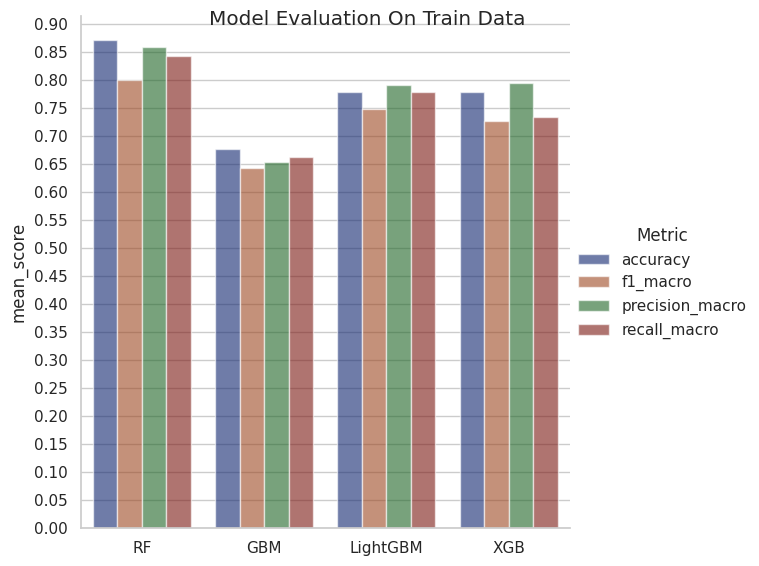

In [ ]:
# fig, ax = plt.subplots()
g=sns.catplot(
    data=train_viz_data,
    kind="bar",
    x="model_name",
    y="train_mean",
    hue="eval_metric",
    palette="dark",
    alpha=.6,
    height=6
);

# Set axis labels
g.set_axis_labels("", "mean_score")

# Set legend title
g.legend.set_title("Metric")

# Set figure title
g.fig.suptitle("Model Evaluation On Train Data\n")

# Set y-ticks with a scale of 0.05
g.ax.set_yticks([i * 0.05 for i in range(int(g.ax.get_ylim()[1] / 0.05) + 1)])

# Show the plot
plt.show()

## 6.3 Model Selection
Evaluation on Test Data

In [ ]:
import pickle

# Define a list to store the loaded models
loaded_models = []

# Define the list of model names
model_names = ['RF', 'GBM', 'LightGBM', 'XGB']

# Iterate over each model name
for model_name in model_names:
    # Specify the file path of the corresponding .pkl file
    file_path = f"models/{model_name}_model.pkl"

    # Open the file in binary read mode
    with open(file_path, 'rb') as file:
        # Use pickle.load() to deserialize and load the model from the file
        loaded_model = pickle.load(file)

        # Append the loaded model to the list of loaded models
        loaded_models.append((model_name, loaded_model))

In [ ]:
from sklearn.metrics import (
    accuracy_score, f1_score,
    precision_score, recall_score
)

# Define lists to store the evaluation metrics for each model
accuracies = []
f1_scores = []
precisions = []
recalls = []

# Iterate over each loaded model
for model_name, loaded_model in loaded_models:
    # Predict using the loaded model on the test data
    y_pred = loaded_model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Append the metrics to the respective lists
    accuracies.append((model_name, accuracy))
    f1_scores.append((model_name, f1))
    precisions.append((model_name, precision))
    recalls.append((model_name, recall))

evaluation_results = pd.DataFrame({
    'Model': [model_name for model_name, _ in loaded_models],
    'Accuracy': [accuracy for _, accuracy in accuracies],
    'F1 Score': [f1 for _, f1 in f1_scores],
    'Precision': [precision for _, precision in precisions],
    'Recall': [recall for _, recall in recalls],
})

# Print the DataFrame
evaluation_results

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,Model,Accuracy,F1 Score,Precision,Recall
0,RF,0.922078,0.888889,0.888889,0.888889
1,GBM,0.896104,0.851852,0.851852,0.851852
2,LightGBM,0.909091,0.872727,0.857143,0.888889
3,XGB,0.909091,0.867925,0.884615,0.851852


In [ ]:
# Melt the evaluation_results DataFrame
melted_evaluation_results = pd.melt(
    evaluation_results,
    id_vars=['Model'],
    value_vars=[
        'Accuracy', 'F1 Score',
        'Precision', 'Recall'
    ],
    var_name='Metric',
    value_name='Value'
)

# Print the melted DataFrame
melted_evaluation_results

,Model,Metric,Value
0,RF,Accuracy,0.922078
1,GBM,Accuracy,0.896104
2,LightGBM,Accuracy,0.909091
3,XGB,Accuracy,0.909091
4,RF,F1 Score,0.888889
5,GBM,F1 Score,0.851852
6,LightGBM,F1 Score,0.872727
7,XGB,F1 Score,0.867925
8,RF,Precision,0.888889
9,GBM,Precision,0.851852


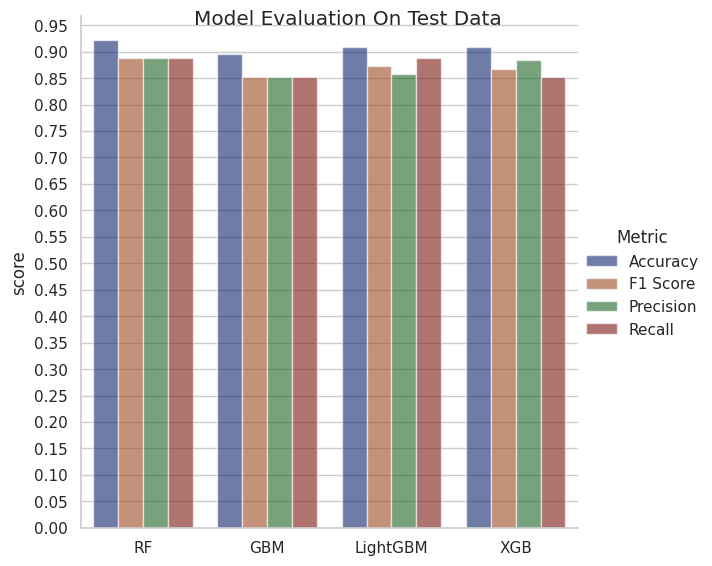

In [ ]:
# fig, ax = plt.subplots()
g=sns.catplot(
    data=melted_evaluation_results,
    kind="bar",
    x="Model",
    y="Value",
    hue="Metric",
    palette="dark",
    alpha=.6,
    height=6
);

# Set axis labels
g.set_axis_labels("", "score")

# Set legend title
g.legend.set_title("Metric")

# Set figure title
g.fig.suptitle("Model Evaluation On Test Data")

# Set y-ticks with a scale of 0.05
g.ax.set_yticks([i * 0.05 for i in range(int(g.ax.get_ylim()[1] / 0.05) + 1)])

# Show the plot
plt.show()

Best Model:

model_name =>	Recall = value

# 7.&nbsp;Storytelling:



Bagian 1

Di bagian 1 ada deskripsi dari data yang akan di analisis. Deskripsi dari isi datanya ini sangat penting untuk kita menentukan mau diapakan datanya nanti. Disini juga kita bisa tau fitur-fitur apa saja yang ada di dalamnya. Ada 9 fitur pada dataset ini yaitu : Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabestesPredigreeFunction, Age & Outcome. Di dataset ini tidak ada fitur gender karena datanya hanya untuk wanita.  

Bagian 2

Di bagian 2 ada Exploratory data analysis (EDA) disini kita melakukan perintah seperti df.head() untuk melihat 5 data teratas, df.tail() untuk melihat 5 data terbawah, df.shape untuk melihat jumlah row dan column. Pada data ini terdapat 768 baris dan 9 kolom, lalu ada juga df.info() untuk melihat type data dan jumlah null, lalu ada juga df.describe dengan argumen presentil(0.05, 0.25, 0.50 (median), 0.75, 0.90, 0.95, dan 0.99)

Bagian 3

Di bagian 3 ada data visualization, nah dari korelasi yang di dapat menunjukan bahwa kolom pregnancies dan kolom age terdapat hubungan positif antar kedua kolom/fitur. Lalu juga ada perintah untuk melihat 10 kolom yang berhubungan erat dengan kolom ‘outcome’. Di bagian 3 juga ada histogram yang menunjukan corelasi matrix antara kolom outcome dengan kolom-kolom yang lain. Jadi kolom outcome merupakan kolom yang berisi bilangan biner dimana 1 artinya pasien mempunyai penyakit medis yang lain, sedangkan 0 tidak punya.

Bagian 4

Di bagian 4 terdapat data preprocessing, pada proses ini kita menemukan missing value pada kolom Glucose, BloodPressure, SkinThickness, Insulin, BMI. Cara menghandel missing value pada dataset ini yaitu dengan mengisi kolom NaN dengan median. Selain missing values ternyata dataset ini juga ada outlier di kolom SkinThickness dan kolom insulin. Cara menangani outliers pada dataset ini yaitu dengan menggantikannya dengan nilai pada batas bawah dan batas atas yang sebelumnya telah di tentukan.

Bagian 5

Dibagian 5 ada feature engineering, yang pertama melakukan fitur kategori dimana pada dataset ini membuat fitur baru untuk Class Glucose ( Normal / pre-Diabetes), BMI range (Obese/Overweight/Healthy/Underweight), Class bloodPressure ( Normal, HS1, HS2) & Class SkinThickness. Fitur baru ini dibuat berdasarkan deskripsi yang ada di bagian 1.1 & 1.2. langkah selanjutnya one hot encoding ini mengubah data kategori dalam dataset menjadi format yang lebih mudah dimengerti oleh model pembelajaran mesin. Yaitu dengan mengubahnya menjadi Boolean(true / false). Tahap terakhir di feature engineering yaitu scaling pada kolom Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction & Age.



